## Inverse Cooking: Recipe Generation from Food Images

In [12]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import os
from args import get_parser
import pickle
from model import get_model
from torchvision import transforms
from utils.output_utils import prepare_output
from PIL import Image
import time

In [13]:
# Reload modules to pick up the fix
import importlib
import modules.transformer_decoder
importlib.reload(modules.transformer_decoder)
import model
importlib.reload(model)

<module 'model' from 'c:\\Users\\91638\\Desktop\\Capstone Sux\\inversecooking\\src\\model.py'>

Set ```data_dir``` to the path including vocabularies and model checkpoint

In [ ]:
data_dir = '../data'

In [ ]:
# code will run in gpu if available and if the flag is set to True, else it will run on cpu
use_gpu = False
device = torch.device('cuda' if torch.cuda.is_available() and use_gpu else 'cpu')
map_loc = None if torch.cuda.is_available() and use_gpu else 'cpu'

In [ ]:
# code below was used to save vocab files so that they can be loaded without Vocabulary class
#ingrs_vocab = pickle.load(open(os.path.join(data_dir, 'final_recipe1m_vocab_ingrs.pkl'), 'rb'))
#ingrs_vocab = [min(w, key=len) if not isinstance(w, str) else w for w in ingrs_vocab.idx2word.values()]
#vocab = pickle.load(open(os.path.join(data_dir, 'final_recipe1m_vocab_toks.pkl'), 'rb')).idx2word
#pickle.dump(ingrs_vocab, open('../demo/ingr_vocab.pkl', 'wb'))
#pickle.dump(vocab, open('../demo/instr_vocab.pkl', 'wb'))

ingrs_vocab = pickle.load(open(os.path.join(data_dir, 'ingr_vocab.pkl'), 'rb'))
vocab = pickle.load(open(os.path.join(data_dir, 'instr_vocab.pkl'), 'rb'))

ingr_vocab_size = len(ingrs_vocab)
instrs_vocab_size = len(vocab)
output_dim = instrs_vocab_size

In [ ]:
print (instrs_vocab_size, ingr_vocab_size)

In [14]:
t = time.time()
import sys; sys.argv=['']; del sys
args = get_parser()
args.maxseqlen = 15
args.ingrs_only=False
model = get_model(args, ingr_vocab_size, instrs_vocab_size)
# Load the trained model parameters
model_path = os.path.join(data_dir, 'modelbest.ckpt')
model.load_state_dict(torch.load(model_path, map_location=map_loc))
model.to(device)
model.eval()
model.ingrs_only = False
model.recipe_only = False
print ('loaded model')
print ("Elapsed time:", time.time() -t)


c:\Users\91638\Desktop\Capstone Sux\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\91638\Desktop\Capstone Sux\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\91638\Desktop\Capstone Sux\.venv\Lib\site-packages\torch\nn\_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


loaded model
Elapsed time: 1.2229206562042236


In [ ]:
transf_list_batch = []
transf_list_batch.append(transforms.ToTensor())
transf_list_batch.append(transforms.Normalize((0.485, 0.456, 0.406), 
                                              (0.229, 0.224, 0.225)))
to_input_transf = transforms.Compose(transf_list_batch)

In [ ]:
greedy = [True, False, False, False]
beam = [-1, -1, -1, -1]
temperature = 1.0
numgens = len(greedy)

Set ```use_urls = True``` to get recipes for images in ```demo_urls```. 

You can also set ```use_urls = False``` and get recipes for images in the path in ```data_dir/test_imgs```.

In [17]:
import requests
from io import BytesIO
import random
from collections import Counter
use_urls = False # set to true to load images from demo_urls instead of those in test_imgs folder
show_anyways = False #if True, it will show the recipe even if it's not valid
image_folder = os.path.join(data_dir, 'demo_imgs')

if not use_urls:
    demo_imgs = os.listdir(image_folder)
    random.shuffle(demo_imgs)

demo_urls = ['https://food.fnr.sndimg.com/content/dam/images/food/fullset/2013/12/9/0/FNK_Cheesecake_s4x3.jpg.rend.hgtvcom.826.620.suffix/1387411272847.jpeg',
            'https://www.196flavors.com/wp-content/uploads/2014/10/california-roll-3-FP.jpg']

demo_files = demo_urls if use_urls else demo_imgs

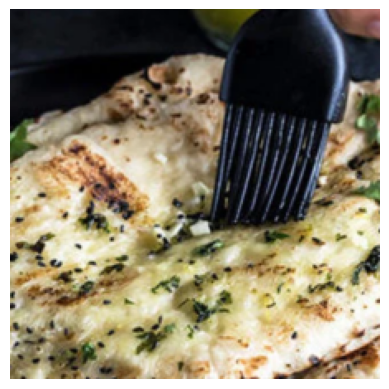

RECIPE 1

Title: Grilled salmon with lemon and feta

Ingredients:
cheese, fillets, pepper, oil, salt, juice

Instructions:
-Preheat grill to medium heat.
-In a small bowl, combine the lemon juice, olive oil, salt and pepper.
-Brush the salmon fillets with the lemon mixture and place on the grill.
-Cook for about 5 minutes per side, or until the fish flakes easily with a fork.
-Sprinkle with feta cheese and serve.
Not a valid recipe!
Reason:  no eos found
RECIPE 2

Title: Tilapia with lime cheese

Ingredients:
cheese, fillets, pepper, oil, salt, juice

Instructions:
-In a small bowl mix the cream cheese with the lemon juice, pepper and the salt.
-Heat the oil in a large skillet and cook the fillets over medium-high heat for 2 minutes on each side.
-Top with the salmon and serve immediately.
RECIPE 3

Title: Baked parmesan tilapia

Ingredients:
cheese, fillets, pepper, oil, salt, juice

Instructions:
-Preheat the oven to 400 degrees f.
-In a medium-sized bowl combine the olive oil and le

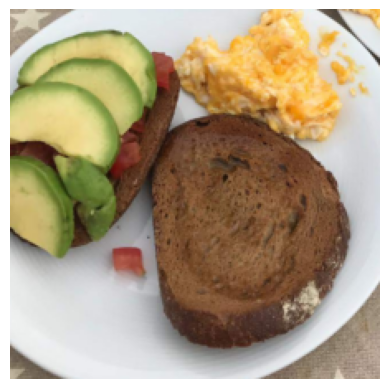

RECIPE 1

Title: Avocado egg salad sandwich

Ingredients:
avocado, bread, tomato, mayonnaise, pepper, egg, salt

Instructions:
-Toast bread.
-Spread mayonnaise on one side of each slice.
-Place avocado slices on one slice of bread.
-Top with tomato slices and salt and pepper.
-Top with other slice of bread.
RECIPE 2

Title: Avocado & egg toast recipe

Ingredients:
avocado, bread, tomato, mayonnaise, pepper, egg, salt

Instructions:
-Slice avocado and egg white and place on bread
-Top with tomato slices and mayonnaise
-Season with salt and black pepper
RECIPE 3

Title: Avocado egg sandwich

Ingredients:
avocado, bread, tomato, mayonnaise, pepper, egg, salt

Instructions:
-Mash up the avocado.
-Add in the seasonings.
-Spread on bread.
-I prefer to top up with mayonnaise.
-Enjoy
RECIPE 4

Title: Avocado and tomato egg sandwich

Ingredients:
avocado, bread, tomato, mayonnaise, pepper, egg, salt

Instructions:
-Cut bread in half, lengthwise and remove the yolk.
-Mash the avocado with a fork

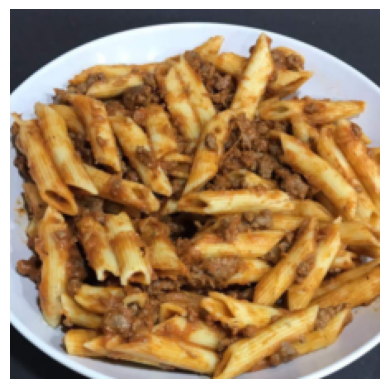

RECIPE 1

Title: Penne with caramelized onions

Ingredients:
cheese, pasta, pepper, onion, oil

Instructions:
-Heat oil in large skillet over medium-high heat.
-Add onions; cook until golden brown, stirring occasionally, about 15 minutes.
-Add pasta and cook until heated through, stirring occasionally, about 10 minutes.
-Season with salt and pepper.
-Sprinkle with cheese.
RECIPE 2

Title: Ziti with cheese sauce

Ingredients:
cheese, pasta, pepper, onion, oil

Instructions:
-Heat oil in large deep skillet over medium high heat.
-Add onion; cook, stirring frequently, until tender, about 5 minutes.
-Season with salt and pepper.
-Mix ricotta cheese and 3/4 cup mozzarella cheese in large bowl.
-Add ziti and 1 cup mozzarella to ricotta cheese mixture; stir until blended.
-Season to taste with salt and pepper.
-Transfer ziti to large bowl and toss with remaining mozzarella.
-Cover and keep warm.
-Meanwhile, bring large pot of salted water to boil.
-Add pasta and cook according to package inst

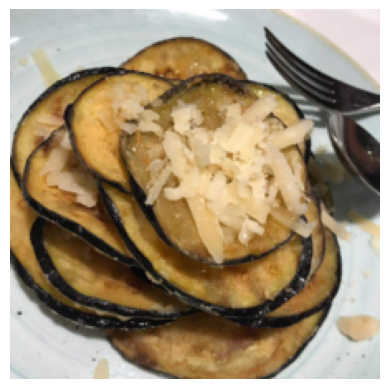

RECIPE 1

Title: Grilled eggplant and zucchini

Ingredients:
zucchini, oil, salt, eggplant, pepper

Instructions:
-Preheat grill to medium-high.
-Brush eggplant slices with oil and season with salt and pepper.
-Grill, turning once, until tender and lightly charred, about 10 minutes.
-Transfer to a platter and let cool.
-Cut into 1/2-inch slices.
-Serve warm.
RECIPE 2

Title: Zucchini chips

Ingredients:
zucchini, oil, salt, eggplant, pepper

Instructions:
-Preheat grill.
-Slice the eggplant thinly.
-Sprinkle salt and pepper on top.
-Brush oil and grill over medium heat.
-Grill for 10 minutes until tender.
-Turn over the zucchini and grill for another 5 to 8 minutes.
RECIPE 3

Title: Grilled eggplant & zucchini with garlic salt

Ingredients:
zucchini, oil, salt, eggplant, pepper

Instructions:
-Slice eggplant lengthwise into 1/4 to 3/4 inch thick slices.
-Brush both sides of eggplant slices with some olive oil.
-Sprinkle with salt and pepper, then grill until nicely browned and cooked t

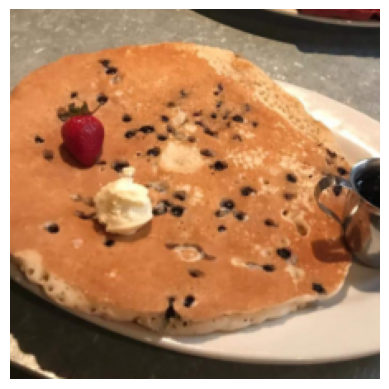

RECIPE 1

Title: Easy pancakes

Ingredients:
sugar, flour, egg, salt, butter, baking_powder, milk, oil

Instructions:
-Mix all ingredients together.
-Heat skillet and pour 1/4 cup of batter onto skillet.
-Cook until bubbles form on top.
-Flip and cook until golden brown.
Not a valid recipe!
Reason:  no eos found
Not a valid recipe!
Reason:  no eos found
RECIPE 2

Title: Basic crepes in your blender

Ingredients:
sugar, flour, egg, salt, butter, baking_powder, milk, oil

Instructions:
-In a blender combine the milk, eggs, and melted butter and puree until smooth.
-In a medium bowl whisk together the flour, sugar, baking powder and salt until combined.
-With a rubber spatula fold in the wet ingredients and then whisk until the batter is smooth and thick and smooth.
-Preheat a non-stick frying pan over medium heat.
-When hot, pour a scant 1/4 cup of batter into the pan and cook for about 2 minutes.
-Flip the crepe using tongs to cook for another 2 minutes.
-Repeat the process for the rema

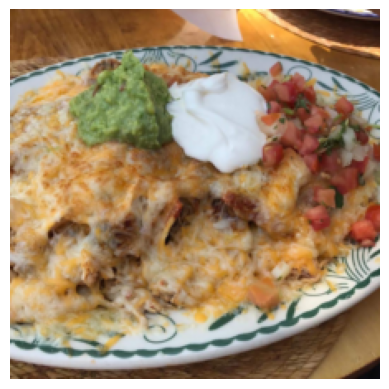

RECIPE 1

Title: Chicken enchiladas

Ingredients:
cheese, tortilla, onion, cream, enchilada_sauce, chicken, chili, beans, pepper, tomato, cumin

Instructions:
-Preheat oven to 350 degrees.
-In a large bowl, combine chicken, beans, tomatoes, onion, green chilies, cumin, and chili powder.
-Spoon about 1/4 cup of the chicken mixture down the center of each tortilla.
-Roll up and place seam side down in a greased 13x9 baking dish.
-Pour enchilada sauce over enchiladas.
-Sprinkle with cheese.
-Bake uncovered for 20 minutes.
RECIPE 2

Title: Chicken enchilada bake

Ingredients:
cheese, tortilla, onion, cream, enchilada_sauce, chicken, chili, beans, pepper, tomato, cumin

Instructions:
-Preheat oven to 350f spray a 9x13 pan with nonstick cooking spray and set aside.
-In an oven proof bowl mix together cream cheese, enchilada sauce, sour cream, cumin, pepper flakes, and chili powder until blended well.
-Place about 1/2 cup chicken mixture in the bottom of a greased 9x13 inch pan and cover with

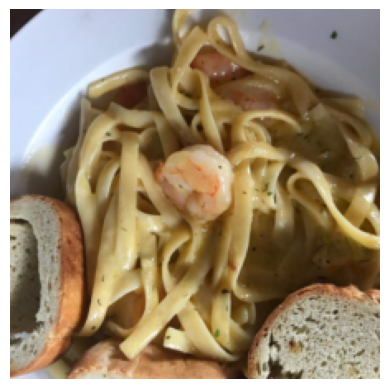

RECIPE 1

Title: Garlic shrimp scampi

Ingredients:
shrimp, pepper, butter, clove, oil, salt, pasta, parsley

Instructions:
-Heat olive oil in a large skillet over medium heat.
-Cook and stir garlic in hot oil until fragrant, about 1 minute.
-Stir shrimp into garlic; cook and stir until shrimp are pink and opaque, about 3 minutes.
-Season with salt and pepper.
-Stir butter into shrimp mixture until melted and sauce is heated through, about 2 minutes.
-Stir parsley into shrimp mixture; cook and stir until heated through, about 1 minute.
Not a valid recipe!
Reason:  no eos found
RECIPE 2

Title: Pasta with shrimp

Ingredients:
shrimp, pepper, butter, clove, oil, salt, pasta, parsley

Instructions:
-Boil pasta in salted water until al dente according to the package directions.
-Reserve a cup of the water and set aside.
-In a large skillet, melt butter with oil and saute garlic until tender.
-Stir in shrimp and cook about 2 minutes.
-Season to taste with salt and pepper.
-Stir in cooked pa

In [18]:
for img_file in demo_files:
    
    if use_urls:
        response = requests.get(img_file)
        image = Image.open(BytesIO(response.content))
    else:
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path).convert('RGB')
    
    transf_list = []
    transf_list.append(transforms.Resize(256))
    transf_list.append(transforms.CenterCrop(224))
    transform = transforms.Compose(transf_list)
    
    image_transf = transform(image)
    image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)
    
    plt.imshow(image_transf)
    plt.axis('off')
    plt.show()
    plt.close()
    
    num_valid = 1
    for i in range(numgens):
        with torch.no_grad():
            outputs = model.sample(image_tensor, greedy=greedy[i], 
                                   temperature=temperature, beam=beam[i], true_ingrs=None)
            
        ingr_ids = outputs['ingr_ids'].cpu().numpy()
        recipe_ids = outputs['recipe_ids'].cpu().numpy()
            
        outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)
        
        if valid['is_valid'] or show_anyways:
            
            print ('RECIPE', num_valid)
            num_valid+=1
            #print ("greedy:", greedy[i], "beam:", beam[i])
    
            BOLD = '\033[1m'
            END = '\033[0m'
            print (BOLD + '\nTitle:' + END,outs['title'])

            print (BOLD + '\nIngredients:'+ END)
            print (', '.join(outs['ingrs']))

            print (BOLD + '\nInstructions:'+END)
            print ('-'+'\n-'.join(outs['recipe']))

            print ('='*20)

        else:
            pass
            print ("Not a valid recipe!")
            print ("Reason: ", valid['reason'])
        

In [19]:
# Search for Indian cuisine related ingredients in the vocabulary
indian_keywords = ['naan', 'curry', 'masala', 'tikka', 'tandoori', 'paneer', 'biryani', 
                   'samosa', 'chutney', 'dal', 'ghee', 'turmeric', 'cumin', 'coriander',
                   'cardamom', 'garam', 'chapati', 'roti', 'paratha', 'dosa', 'idli',
                   'raita', 'lassi', 'mango', 'tamarind', 'fenugreek', 'mustard']

print("=== Searching for Indian ingredients in vocabulary ===\n")
found_indian = []
for keyword in indian_keywords:
    for ingr in ingrs_vocab:
        if keyword.lower() in str(ingr).lower():
            found_indian.append(ingr)
            print(f"Found: {ingr}")

print(f"\n=== Total Indian-related ingredients found: {len(set(found_indian))} out of {len(ingrs_vocab)} total ===")
print(f"\nAll unique matches: {list(set(found_indian))}")

=== Searching for Indian ingredients in vocabulary ===

Found: curry
Found: masala
Found: tandoori_paste
Found: tandoori_spice_mix
Found: chutney
Found: dal
Found: ghee
Found: turmeric
Found: cumin
Found: coriander
Found: cardamom
Found: chapati
Found: whole_wheat_rotini
Found: raita
Found: mango
Found: frozen_mango_chunks
Found: tamarind_paste
Found: tamarind_pulp
Found: dried_tamarind
Found: tamarind_pods
Found: ground_fenugreek
Found: fenugreek_leaves
Found: mustard

=== Total Indian-related ingredients found: 23 out of 1488 total ===

All unique matches: ['fenugreek_leaves', 'dried_tamarind', 'turmeric', 'whole_wheat_rotini', 'tamarind_pulp', 'mango', 'raita', 'cumin', 'chapati', 'mustard', 'ground_fenugreek', 'cardamom', 'masala', 'chutney', 'coriander', 'frozen_mango_chunks', 'tandoori_spice_mix', 'tamarind_paste', 'tandoori_paste', 'curry', 'ghee', 'dal', 'tamarind_pods']
